In [15]:
import pandas as pd

## Import Dataset

In [21]:
housing = pd.read_csv('../data/external/housing/housing.csv')

In [22]:
# details
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
# details variables
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

We notice that the data has *10* columns with *20 640* rows. There a one variable *total_bedrooms* with some missing values (207 (1%)). The variable *ocean_proximity* has one item **ISLAND** with only *5* occurence.

#### Visual Exploration

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

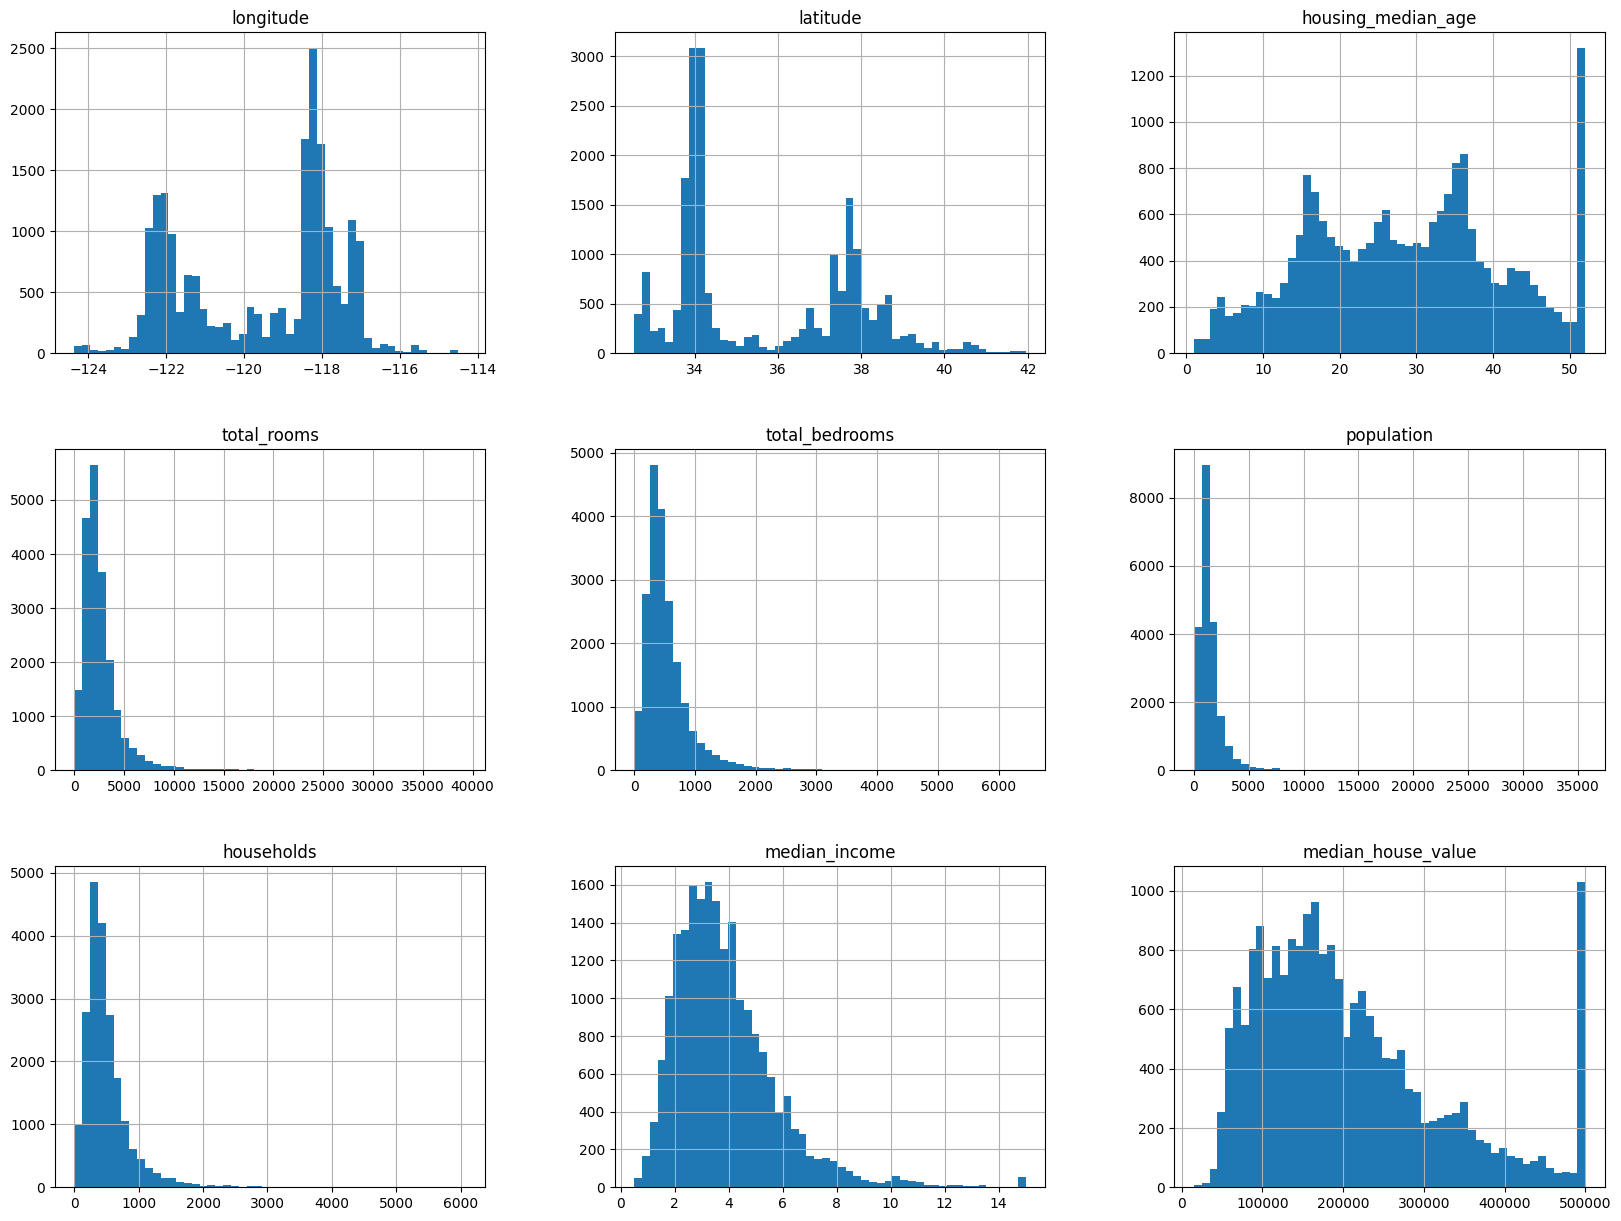

In [29]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

#### Split data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_set, test_set = train_test_split(housing, test_size=.2, random_state=42, shuffle=True)

In [34]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


In [35]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN


In [56]:
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)

In [57]:

housing['income_cat'].value_counts()

income_cat
3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: count, dtype: int64

In [58]:

housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

C:\Users\bomyr\AppData\Local\Temp\ipykernel_29192\3592313441.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [60]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)

In [61]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [62]:
housing['income_cat'].value_counts() / len(housing)

income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

In [63]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [64]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

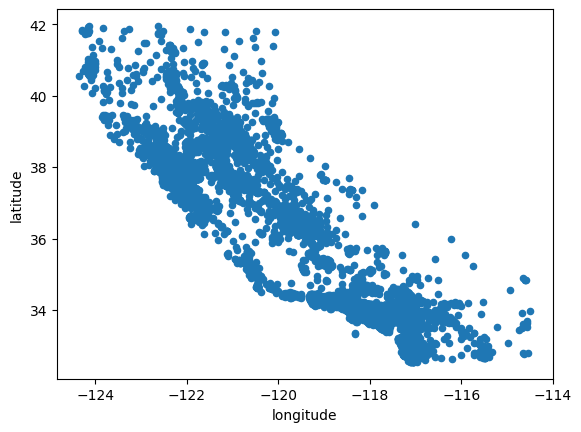

In [65]:
housing.plot(kind='scatter', x='longitude',  y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

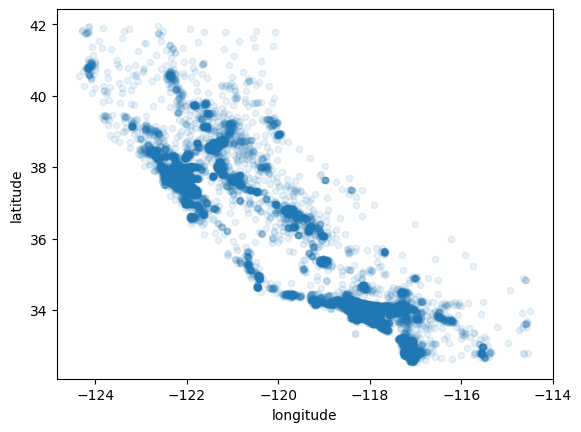

In [66]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

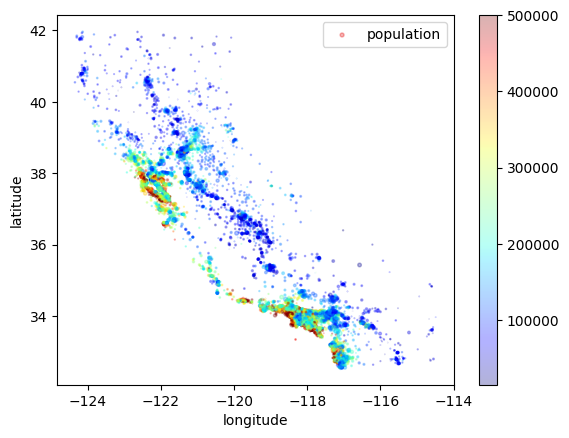

In [73]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
             s=housing['population']/1000, label='population',
             c=housing['median_house_value'], colorbar = True,
             cmap = plt.get_cmap("jet"))
plt.legend()

In [76]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [78]:
corr_matrix = housing_num.corr()

In [79]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

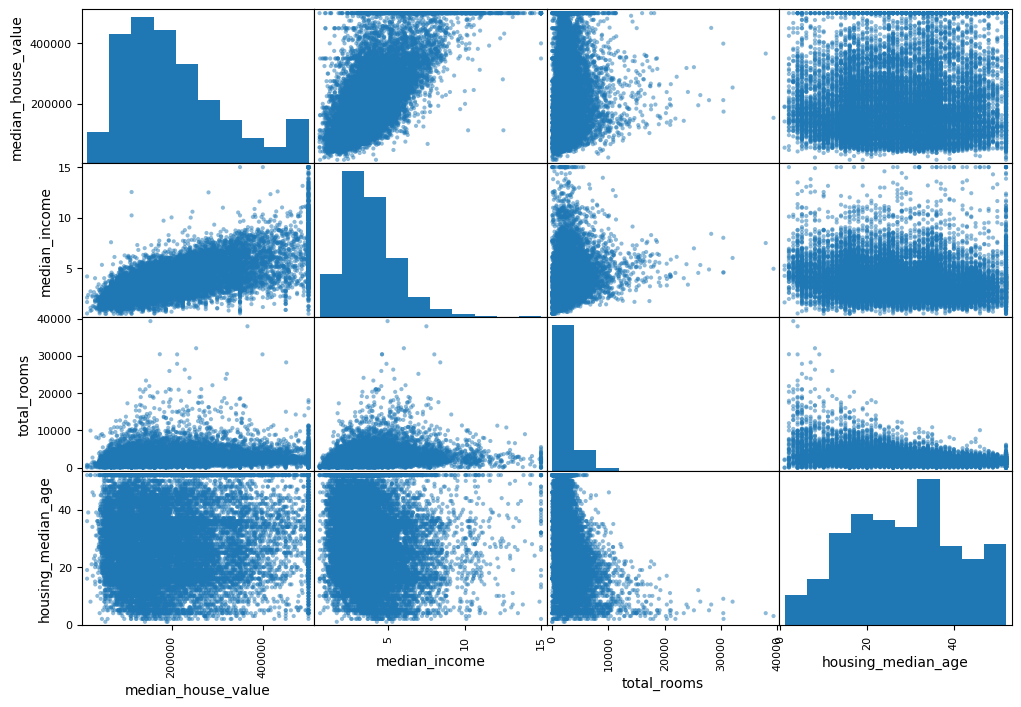

In [80]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

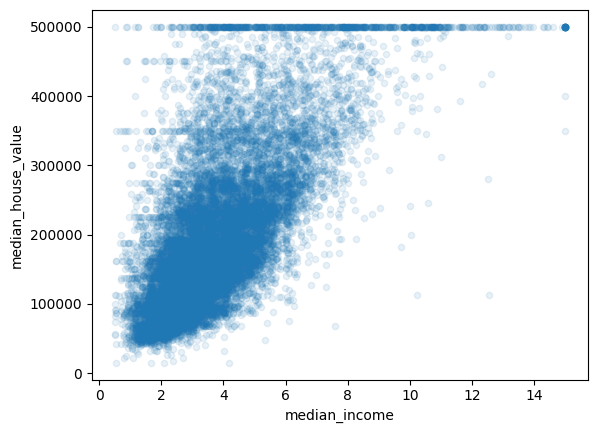

In [84]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [85]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [86]:
housing_num = housing.drop('ocean_proximity', axis=1)
corr_matrix = housing_num.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688380
rooms_per_household         0.143663
total_rooms                 0.137455
housing_median_age          0.102175
households                  0.071426
total_bedrooms              0.054635
population                 -0.020153
population_per_household   -0.038224
longitude                  -0.050859
latitude                   -0.139584
bedrooms_per_room          -0.256397
Name: median_house_value, dtype: float64

## Prepare Data for Machine Learning Algorithms

In [87]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [90]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")


In [91]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [92]:
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [93]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [94]:
X = imputer.transform(housing_num)

In [96]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [97]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [98]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [105]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [112]:
ordinal_encoder.min_frequency

In [106]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
housing_cat_encoded = label_encoder.fit_transform(housing_cat.ocean_proximity)
housing_cat_encoded

array([3, 0, 1, ..., 4, 0, 4], shape=(16512,))

In [108]:
print(label_encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [113]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [115]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

In [116]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]], shape=(16512, 5))

In [117]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='<U10')

In [118]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [120]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [121]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
13096,-122.42,37.8,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,3.211799,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5.504202,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.433,INLAND,5.334975,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,5.351282,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3.725256,1.631399


In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [123]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=False)),
    ('std_scaler', StandardScaler())
])

In [125]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr[:5]

array([[-1.42303652,  1.0136059 ,  1.86111875,  0.31191221,  1.36816703,
         0.13746004,  1.39481249, -0.93649149, -0.86602737, -0.33020372],
       [ 0.59639445, -0.702103  ,  0.90762971, -0.30861991, -0.43592476,
        -0.69377062, -0.37348471,  1.17194198,  0.0245495 , -0.25361631],
       [-1.2030985 ,  1.27611874,  0.35142777, -0.71224036, -0.76070869,
        -0.78876841, -0.77572662, -0.75978881, -0.04119332, -0.05104091],
       [ 1.23121557, -0.88492444, -0.91989094,  0.70226169,  0.74230601,
         0.38317548,  0.73137454, -0.85028088, -0.03485833, -0.14147547],
       [ 0.71136206, -0.87554898,  0.58980003,  0.79012465,  1.59575285,
         0.44437597,  1.75526303, -0.18036472, -0.66655412, -0.30614815]])

In [127]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_names):
        self.attributes_names = attributes_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attributes_names].values        

In [157]:
num_attributes = list(housing_num.columns)
cat_attributes = ["ocean_proximity"]
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attributes)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=False)),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attributes)),
    ('label_binarizer', OneHotEncoder())
])

In [158]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [159]:
housing_prepared = full_pipeline.fit_transform(housing)

In [160]:
num_pipeline_2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
    ('std_scaler', StandardScaler())
])

In [161]:
from sklearn.compose import ColumnTransformer
full_pipeline_2 = ColumnTransformer([
        ("num", num_pipeline_2, num_attributes),
        ("cat", OneHotEncoder(), cat_attributes),
    ])

housing_prepared_2 = full_pipeline_2.fit_transform(housing)

In [162]:
housing_prepared.toarray()

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]], shape=(16512, 15))

In [163]:
housing_prepared_2.shape

(16512, 16)

## Select and Train a Model

### Trainig and Evaluating on Training Set

In [169]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_2, housing_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [170]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline_2.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [275330.35884617 333704.32342795 118646.10818359 108968.46475602
 308700.66411777]


In [171]:
print("Labels:", list(some_labels))

Labels: [458300.0, 483800.0, 101700.0, 96100.0, 361800.0]


In [172]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared_2)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(67876.38884697478)

In [173]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49316.96245459727

In [174]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared_2, housing_labels)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [175]:
housing_predictions = tree_reg.predict(housing_prepared_2)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

## Fine tune your Model

In [176]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared_2, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [177]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [67215.57051411 66716.37427504 68044.50617348 73392.45031567
 69665.63413518 68808.32340024 71339.87980733 72853.02609989
 69383.74839196 69570.34476986]
Mean: 69698.98578827456
Standard deviation: 2121.1582753943576


In [178]:
lin_scores = cross_val_score(lin_reg, housing_prepared_2, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [69828.32112762 66797.97496643 66731.67360276 70387.73616334
 66981.90292887 68235.2732794  67092.04645321 69796.01039238
 67279.32030405 67929.54862609]
Mean: 68105.9807844154
Standard deviation: 1328.589088139287


In [179]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared_2, housing_labels)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [180]:
housing_predictions = forest_reg.predict(housing_prepared_2)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(22153.330268007478)

In [181]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared_2, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51194.98590548 51849.03170946 50873.19604454 52900.83182218
 51026.19165809 52931.52699944 52128.79251092 52775.4420031
 52076.30488724 51429.19605157]
Mean: 51918.54995920156
Standard deviation: 738.326877705045


In [182]:
scores = cross_val_score(lin_reg, housing_prepared_2, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68105.980784
std       1400.455864
min      66731.673603
25%      67009.438810
50%      67604.434465
75%      69405.826114
max      70387.736163
dtype: float64

In [184]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared_2, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared_2)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

np.float64(110633.36012758208)

In [185]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False, True], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared_2, housing_labels)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False, True], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [186]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [187]:
grid_search.best_estimator_

,n_estimators,30
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [188]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64668.349353825375 {'max_features': 2, 'n_estimators': 3}
55147.201847039905 {'max_features': 2, 'n_estimators': 10}
52478.939002690124 {'max_features': 2, 'n_estimators': 30}
59835.265390636116 {'max_features': 4, 'n_estimators': 3}
52404.1428245151 {'max_features': 4, 'n_estimators': 10}
49960.91593979477 {'max_features': 4, 'n_estimators': 30}
57698.5073194775 {'max_features': 6, 'n_estimators': 3}
51090.761177939356 {'max_features': 6, 'n_estimators': 10}
49674.02283546394 {'max_features': 6, 'n_estimators': 30}
57651.04892307494 {'max_features': 8, 'n_estimators': 3}
51529.14166747779 {'max_features': 8, 'n_estimators': 10}
49562.81699665273 {'max_features': 8, 'n_estimators': 30}
61765.10240186634 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54362.64540314856 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58534.66416365905 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51853.32602865104 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [189]:
grid_search.best_estimator_.feature_importances_

array([7.05590874e-02, 6.23433908e-02, 4.32313565e-02, 1.51089894e-02,
       1.48699587e-02, 1.47911081e-02, 1.34439396e-02, 3.58215686e-01,
       5.72946959e-02, 1.11055076e-01, 6.00558038e-02, 9.94128756e-03,
       1.63405592e-01, 8.36248299e-05, 1.91008150e-03, 3.69032167e-03])

In [190]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared_2, housing_labels)

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_features': <scipy.stats....00213A7AC9C60>, 'n_estimators': <scipy.stats....00213A7B6FA30>}"
,n_iter,10
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [191]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48708.31326472803 {'max_features': 7, 'n_estimators': 180}
51041.056877514544 {'max_features': 5, 'n_estimators': 15}
50199.61604052505 {'max_features': 3, 'n_estimators': 72}
50472.24238822742 {'max_features': 5, 'n_estimators': 21}
48910.73135055222 {'max_features': 7, 'n_estimators': 122}
50165.644884705725 {'max_features': 3, 'n_estimators': 75}
50031.371082889214 {'max_features': 3, 'n_estimators': 88}
49139.29733037731 {'max_features': 5, 'n_estimators': 100}
49890.41461230947 {'max_features': 3, 'n_estimators': 150}
64874.549757317705 {'max_features': 5, 'n_estimators': 2}


In [192]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.05590874e-02, 6.23433908e-02, 4.32313565e-02, 1.51089894e-02,
       1.48699587e-02, 1.47911081e-02, 1.34439396e-02, 3.58215686e-01,
       5.72946959e-02, 1.11055076e-01, 6.00558038e-02, 9.94128756e-03,
       1.63405592e-01, 8.36248299e-05, 1.91008150e-03, 3.69032167e-03])

In [193]:
full_pipeline_2.named_transformers_

{'num': Pipeline(steps=[('imputer', SimpleImputer()),
                 ('attribs_adder',
                  FunctionTransformer(func=<function add_extra_features at 0x00000213A25B7880>)),
                 ('std_scaler', StandardScaler())]),
 'cat': OneHotEncoder()}

In [195]:
full_pipeline_2.named_transformers_['cat'].categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [196]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline_2.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.3582156862219976), 'median_income'),
 (np.float64(0.1634055915479917), 'INLAND'),
 (np.float64(0.11105507643702), 'pop_per_hhold'),
 (np.float64(0.07055908736626045), 'longitude'),
 (np.float64(0.06234339082462325), 'latitude'),
 (np.float64(0.0600558037768181), 'bedrooms_per_room'),
 (np.float64(0.05729469585049504), 'rooms_per_hhold'),
 (np.float64(0.04323135648627562), 'housing_median_age'),
 (np.float64(0.015108989437854707), 'total_rooms'),
 (np.float64(0.014869958721729241), 'total_bedrooms'),
 (np.float64(0.014791108125324649), 'population'),
 (np.float64(0.013443939648466055), 'households'),
 (np.float64(0.009941287556570252), '<1H OCEAN'),
 (np.float64(0.0036903216659356247), 'NEAR OCEAN'),
 (np.float64(0.001910081502775376), 'NEAR BAY'),
 (np.float64(8.362482986239294e-05), 'ISLAND')]

In [197]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline_2.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [198]:
final_rmse

np.float64(49898.86032212206)

In [199]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline_2),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([275330.35884617, 333704.32342795, 118646.10818359, 108968.46475602,
       308700.66411777])

In [201]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(housing_prepared_2, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,SVR()
,param_grid,"[{'C': [10.0, 30.0, ...], 'kernel': ['linear']}, {'C': [1.0, 3.0, ...], 'gamma': [0.01, 0.03, ...], 'kernel': ['rbf']}]"
,scoring,'neg_mean_squared_error'
,n_jobs,4
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [202]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

np.float64(71176.80025464059)

In [203]:
grid_search.best_params_

{'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [204]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(housing_prepared_2, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,SVR()
,param_distributions,"{'C': <scipy.stats....00213A77491E0>, 'gamma': <scipy.stats....00213A57620E0>, 'kernel': ['linear', 'rbf']}"
,n_iter,50
,scoring,'neg_mean_squared_error'
,n_jobs,4
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [164]:
list(housing_num.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']